# mini 3: KOSIS(국가통계포털) 데이터 분석
## 9팀 : 경기종합지수 시계열 데이터 분석
사용 데이터 : 경기종합지수(2013.01 ~ 2020.03).csv   
데이터 수집 기간 : 2013.01 ~ 2022.03   

### 5/31 시사점:   
주 분석할 특성 선정하여 EDA 및 데이터 가공 진행   
시각화 - 표준화 - 그룹화 - 인사이트 도출   

[경제종합지수]   
선행지수 : 100을 기준으로 움직이며, 미래 경기를 선행하는 경제 지표 -> KOSPI   
동행지수 : 100을 기준으로 움직이며, 현재 경기와 동행하고 있는 경제 지표 -> 소매판매량      
후행지수 : 100을 기준으로 움직이며, 추후에 과거를 돌아보며, 평가한 경제 지표 -> 취업지수, 생산자재고, 소비재수입액   
순환변동치 : 추세를 제거하여 실제 경제지표를 확인할 수 있도록 만든 지표   
   
df 세분화 : 선행지수 | 동행지수 | 후행지수 - 순환변동치, 경제심리지수


### 6/02 시사점:
[2018.03 ~2022.03 범위 내에서 두 주요 사건을 중심으로 하반부 분석 진행하기]   
금일 베이스라인 코드 이후에 섹터를 나누어 각자 준비한 분석 구도와 인사이트를 추가할 예정.   
그리고 마지막 부분에 우리가 이번 분석을 통해 도출해 낸 인사이트를 정리해서 포스팅할 예정.   
금요일 수업 후 제출코드를 정리한 후 노션까지 완성할 예정.   

## 0. 세팅

In [46]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 한글 폰트 패치.
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False  

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# ggplot style skima
plt.style.use("ggplot")

# 경고문 처리.
import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 불러오기
### 경기종합지수(201301 ~ 202203).csv

In [47]:
file_name = '경기종합지수(201301~202203).csv'
df_total = pd.read_csv('data/'+file_name, encoding='cp949')
df_total['시점'] = [word[:7] for word in df_total['시점']]

In [48]:
# 〔선행지수 순환변동치 전월차〕(p) 10
# 〔동행지수 순환변동치 전월차〕(p) 23
for x in range (len(df_total)):
    if (x%31 == 10):
        df_total.loc[x, "지수별"] = "〔선행지수 순환변동치 전월차〕(p)"
    elif (x%31 == 23):
        df_total.loc[x, "지수별"] = "〔동행지수 순환변동치 전월차〕(p)"

In [49]:
# 선행,동행,후행종합지수별 데이터 분할.
list_a=[]
list_b=[]
list_c=[]

for x in range (len(df_total)):
    if (x%31 >= 0) & (x%31 < 13):
        list_a.append(df_total.loc[x])
    elif x%31 < 24:
        list_b.append(df_total.loc[x])
    else:
        list_c.append(df_total.loc[x])

In [50]:
# 선행종합지수
df_a = pd.DataFrame(list_a, columns=['시점', '지수별', '데이터'])
df_a.head()

,시점,지수별,데이터
0,2013.01,선행종합지수(2015=100),89.8
1,2013.01,선행종합지수 전월비(%),0.2
2,2013.01,재고순환지표(전월차)(%p),-1.7
3,2013.01,경제심리지수(전월차)(p),1.0
4,2013.01,기계류내수출하지수(선박제외)(전월비)(%),-2.0


In [51]:
# 동행종합지수
df_b = pd.DataFrame(list_b, columns=['시점', '지수별', '데이터'])
df_b.head()

,시점,지수별,데이터
13,2013.01,동행종합지수(2015=100),92.1
14,2013.01,동행종합지수 전월비(%),0.1
15,2013.01,광공업생산지수(전월비)(%),0.3
16,2013.01,서비스업생산지수(도소매업제외)(전월비)(%),0.1
17,2013.01,건설기성액(전월비)(%),0.1


In [52]:
# 후행종합지수
df_c = pd.DataFrame(list_c, columns=['시점', '지수별', '데이터'])
df_c.head(4)

,시점,지수별,데이터
24,2013.01,후행종합지수(2015=100),92.2
25,2013.01,후행종합지수 전월비(%),0.3
26,2013.01,생산자제품재고지수(전월비)(%),2.7
27,2013.01,소비자물가지수변화율(서비스)(전월차)(%p),0.1


In [53]:
list_CI=[]
# 선행 : 0~1, 9~12
# 동행 ; 13~14, 22~23
# 후행 : 24~25

for x in range (len(df_total)):
    if ((x%31 >= 0) & (x%31 < 2)) | ((x%31 >= 9) & (x%31 < 15)) | ((x%31 >= 22) & (x%31 < 26)):
        list_CI.append(df_total.loc[x])

In [54]:
df_CI = pd.DataFrame(list_CI, columns=['시점', '지수별', '데이터'])
df_CI.head()

,시점,지수별,데이터
0,2013.01,선행종합지수(2015=100),89.8
1,2013.01,선행종합지수 전월비(%),0.2
9,2013.01,선행지수 순환변동치,99.3
10,2013.01,〔선행지수 순환변동치 전월차〕(p),-0.1
11,2013.01,선행지수 전년동월비(%),2.5


- 정리
    - df_a : 선행종합지수 관련(하위목록 포함)
    - df_b : 동행종합지수 관련(하위목록 포함)
    - df_c : 후행종합지수 관련(하위목록 포함)
    - df_CI : 선행, 동행, 후행 종합지수 관련

### 경제심리지수(201301~202205).csv

In [58]:
# 경기심리지수
# https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_042Y001&conn_path=I2
## 경제심리지수 Economic Sentiment Index 
df_esi = pd.read_csv("data/경제심리지수(201301~202205).csv", encoding = "cp949")
print('df_esi.shape :',df_esi.shape)
df_esi.head()

df_esi.shape : (226, 3)


,시점,지표선택별,데이터
0,2013.01,경제심리지수(원계열),94.5
1,2013.01,경제심리지수(순환변동치),94.1
2,2013.02,경제심리지수(원계열),96.3
3,2013.02,경제심리지수(순환변동치),94.4
4,2013.03,경제심리지수(원계열),98.3


In [59]:
# 경제심리지수 요약정보
df_esi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      226 non-null    float64
 1   지표선택별   226 non-null    object 
 2   데이터     226 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.4+ KB


요약통계를 보면, 시점이 float으로 되어 있기 떄문에 데이터 타입 변경 수요 확인

In [60]:
# 시점 칼럼을 str형으로 변환
df_esi["시점"] = df_esi["시점"].map('{:.2f}'.format).astype(str)
df_esi = df_esi.rename(columns = {"지표선택별" : "지수별"})
print('df_esi.shape :',df_esi.shape)
df_esi.head()

df_esi.shape : (226, 3)


,시점,지수별,데이터
0,2013.01,경제심리지수(원계열),94.5
1,2013.01,경제심리지수(순환변동치),94.1
2,2013.02,경제심리지수(원계열),96.3
3,2013.02,경제심리지수(순환변동치),94.4
4,2013.03,경제심리지수(원계열),98.3


## 2. EDA 및 전처리

### EDA & 시각화 사용자 함수 정의

In [61]:
# 상관관계 히트맵
def corr_matrix(data, cols, title):
    df = data[cols]
    colormap = plt.cm.PuBu 
    plt.figure(figsize=(12, 12)) 
    sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
              square = True, cmap = colormap, linecolor = "white", annot = True, fmt='.2f',
              annot_kws = {"size" : 12}).set_title(title, fontsize=20, y=1.05)
    plt.show()

# 경제지표 변화율 lineplot
def lineplot(df, cols, title):
    fig = go.Figure()
    for i,col in enumerate(cols):
        fig.add_trace(go.Scatter(x=df.index,y=df.loc[:,col],
                 mode='lines+markers', name=col))
    fig.update_layout(title='<b>'+title+'</b>')
    fig.update_xaxes(rangeslider_visible = True)
    fig.show()

# 지표별 박스플롯
def boxplotEDA(data,cols,nrow,ncol,title):
    df = data[cols]
    fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol,3*nrow))
    fig.suptitle(title,size=20)
    i=0
    for col in cols:
        sns.boxplot(y = df[col], ax=ax[i//ncol,i%ncol], palette='Set3', linewidth=1.5)
        i+=1 

# 코로나19 집중영향구간 lineplot
def deep_lineplot(df, col):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index,y=df[col],
                     mode='lines+markers', name=col))
    fig.add_vrect(x0=20, x1=29, 
                  annotation_text="Impact section", annotation_position="top left",
                  fillcolor="green", opacity=0.25, line_width=0)
    fig.add_vline(x=26,line_width=3, line_dash="dash", line_color="red")
    fig.add_annotation(x=26, y=0,
                text="변곡점",
                showarrow=True,
                arrowhead=1)
    fig.update_xaxes(rangeslider_visible = True)
    fig.update_layout(title='<b>동행종합지수 주요특성 분석 : ' + col)
    fig.show()

### Crosstab 변형

In [62]:
# Crosstab 변형 함수
def cross_tab(df):
    df_ct = pd.crosstab(df['시점'], df['지수별'], df['데이터'],aggfunc='mean')
    df_ct.index.name =''
    return df_ct

In [65]:
# Crosstab 변형
df_a_ct = cross_tab(df_a)
df_b_ct = cross_tab(df_b)
df_c_ct = cross_tab(df_c)
df_CI_ct = cross_tab(df_CI)
df_esi_ct = cross_tab(df_esi)

print('df_a_ct.shape :',df_a_ct.shape)
print('df_b_ct.shape :',df_b_ct.shape)
print('df_c_ct.shape :',df_c_ct.shape)
print('df_CI_ct.shape :',df_CI_ct.shape)
print('df_esi_ct.shape :',df_esi_ct.shape)

df_a_ct.shape : (111, 13)
df_b_ct.shape : (111, 11)
df_c_ct.shape : (111, 7)
df_CI_ct.shape : (111, 12)
df_esi_ct.shape : (113, 2)


In [66]:
df_a_ct.head()

지수별,〔선행지수 순환변동치 전월차〕(p),〔전년동월비 전월차〕(%p),건설수주액(전월비)(%),경제심리지수(전월차)(p),기계류내수출하지수(선박제외)(전월비)(%),선행종합지수 전월비(%),선행종합지수(2015=100),선행지수 순환변동치,선행지수 전년동월비(%),수출입물가비율(전월비)(%),장단기금리차(전월차)(%p),재고순환지표(전월차)(%p),코스피(전월비)(%)
,,,,,,,,,,,,,
2013.01,-0.1,0.0,-7.7,1.0,-2.0,0.2,89.8,99.3,2.5,0.3,0.02,-1.7,0.8
2013.02,0.1,0.2,3.4,1.8,-0.5,0.3,90.1,99.4,2.7,0.2,-0.01,-2.2,1.3
2013.03,0.0,0.1,3.1,2.3,-1.1,0.3,90.4,99.4,2.8,0.6,-0.09,-1.4,0.3
2013.04,0.0,0.1,6.1,1.1,-1.1,0.3,90.7,99.4,2.9,0.5,-0.07,0.4,-0.8
2013.05,0.0,0.1,-4.7,0.3,-1.0,0.3,91.0,99.4,3.0,0.8,0.02,1.1,-0.1


### 결측치 & 이상치 처리

In [68]:
# 결측치 처리
print('df_a_ct nan :',df_a_ct.isna().sum().values.sum())
print('df_b_ct nan :',df_b_ct.isna().sum().values.sum())
print('df_c_ct nan :',df_c_ct.isna().sum().values.sum())
print('df_CI_ct nan :',df_CI_ct.isna().sum().values.sum())
print('df_esi_ct nan :',df_esi_ct.isna().sum().values.sum())

df_a_ct nan : 0
df_b_ct nan : 0
df_c_ct nan : 0
df_CI_ct nan : 0
df_esi_ct nan : 0


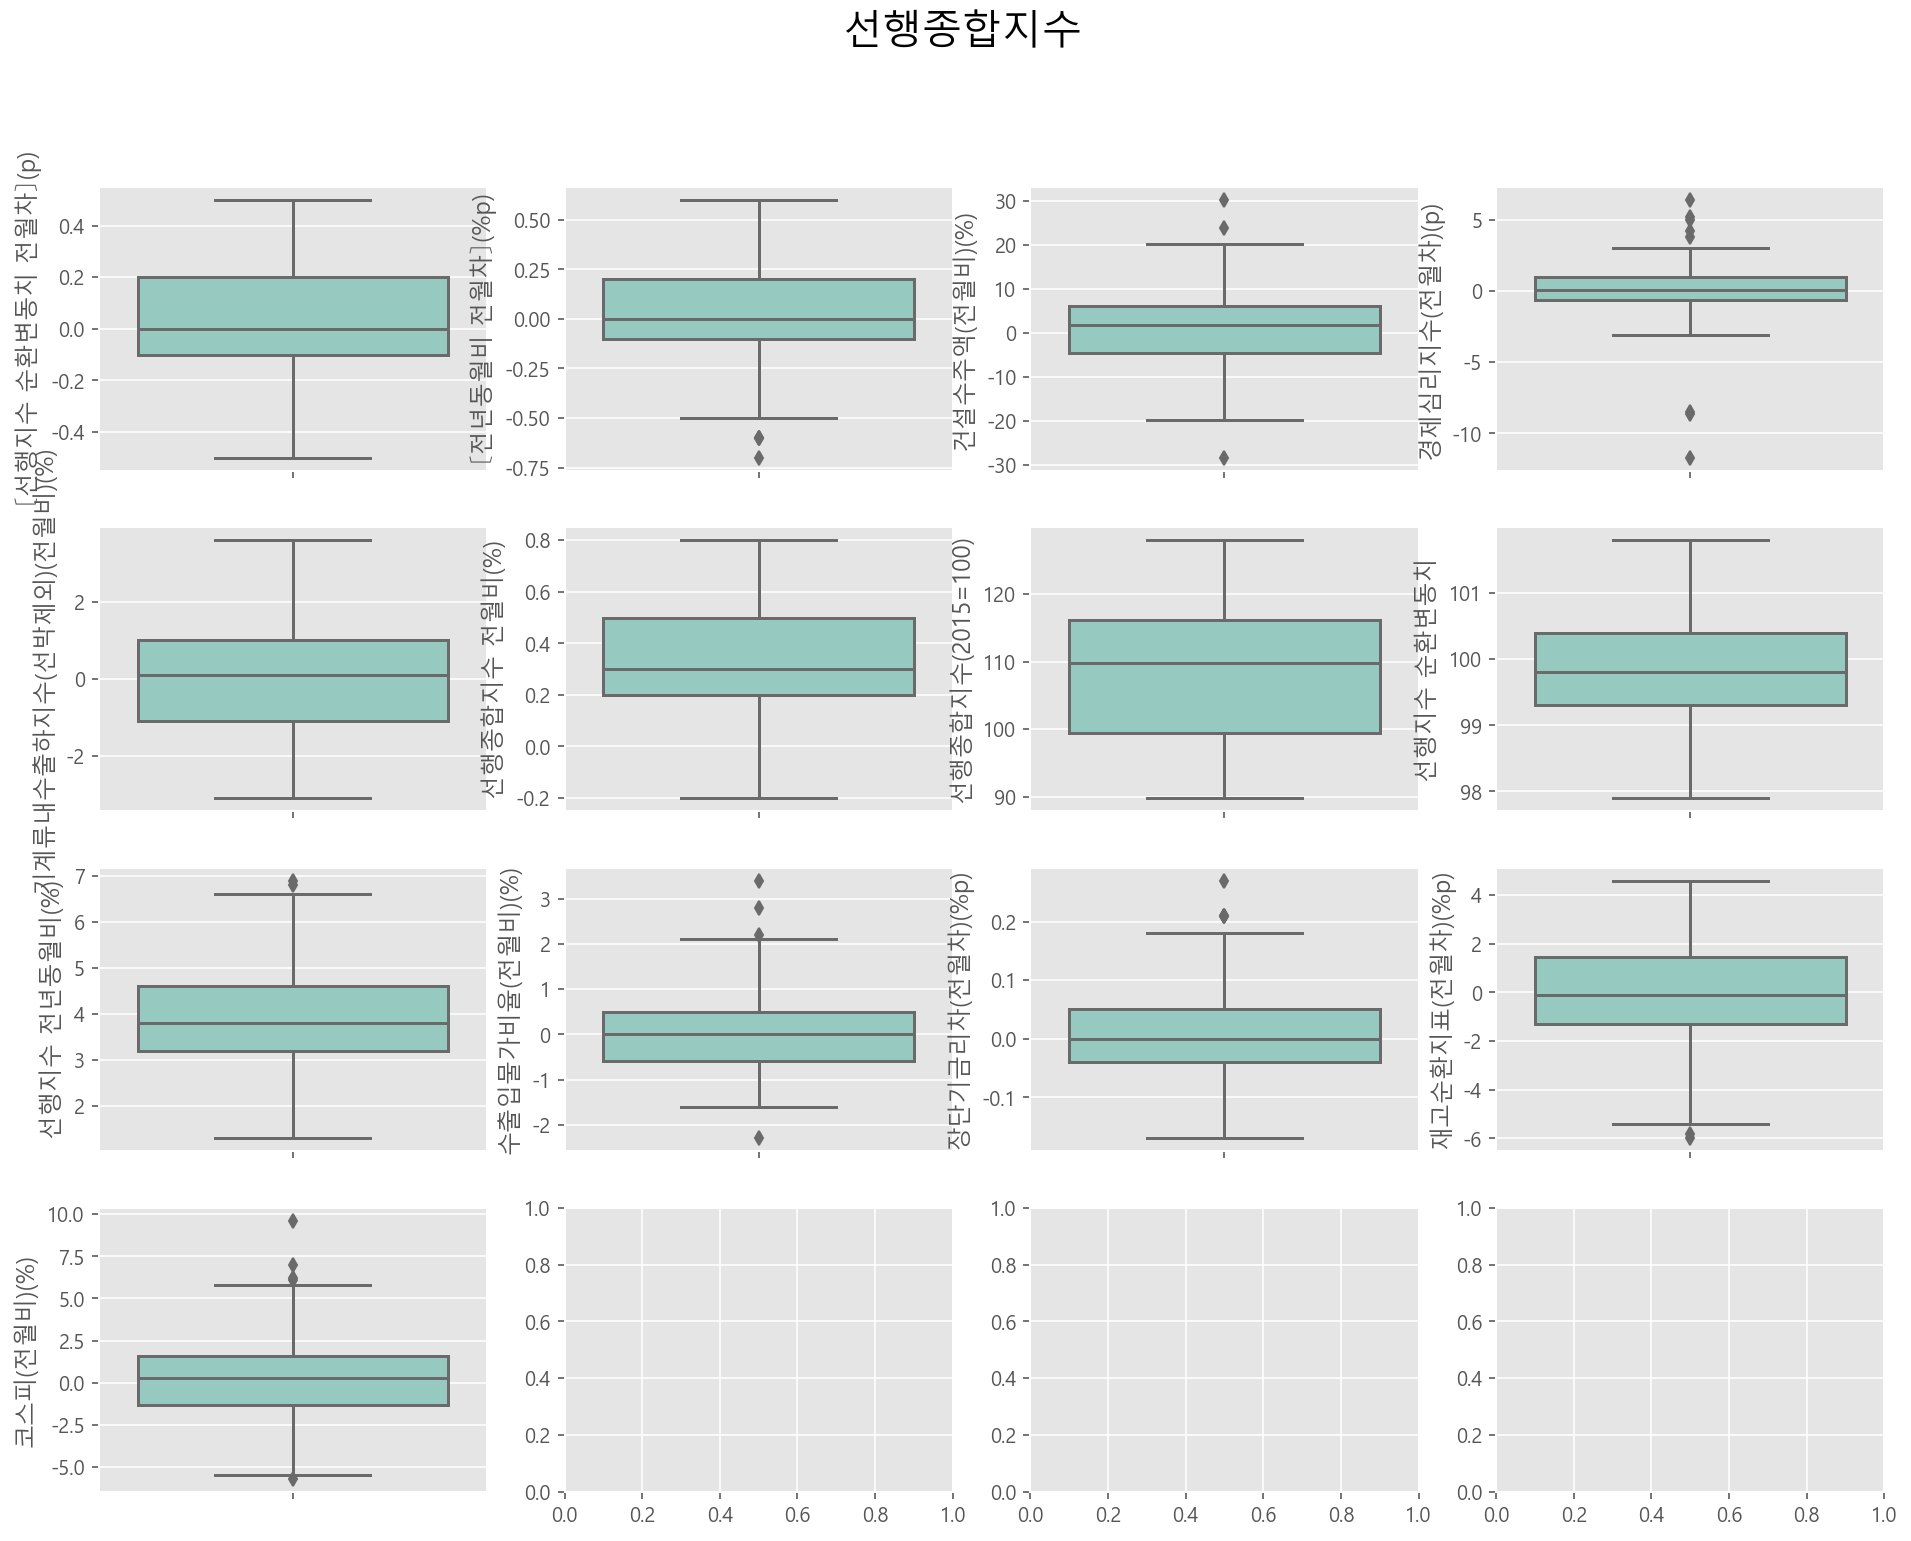

In [69]:
boxplotEDA(df_a_ct,df_a_ct.columns,4,4,'선행종합지수')

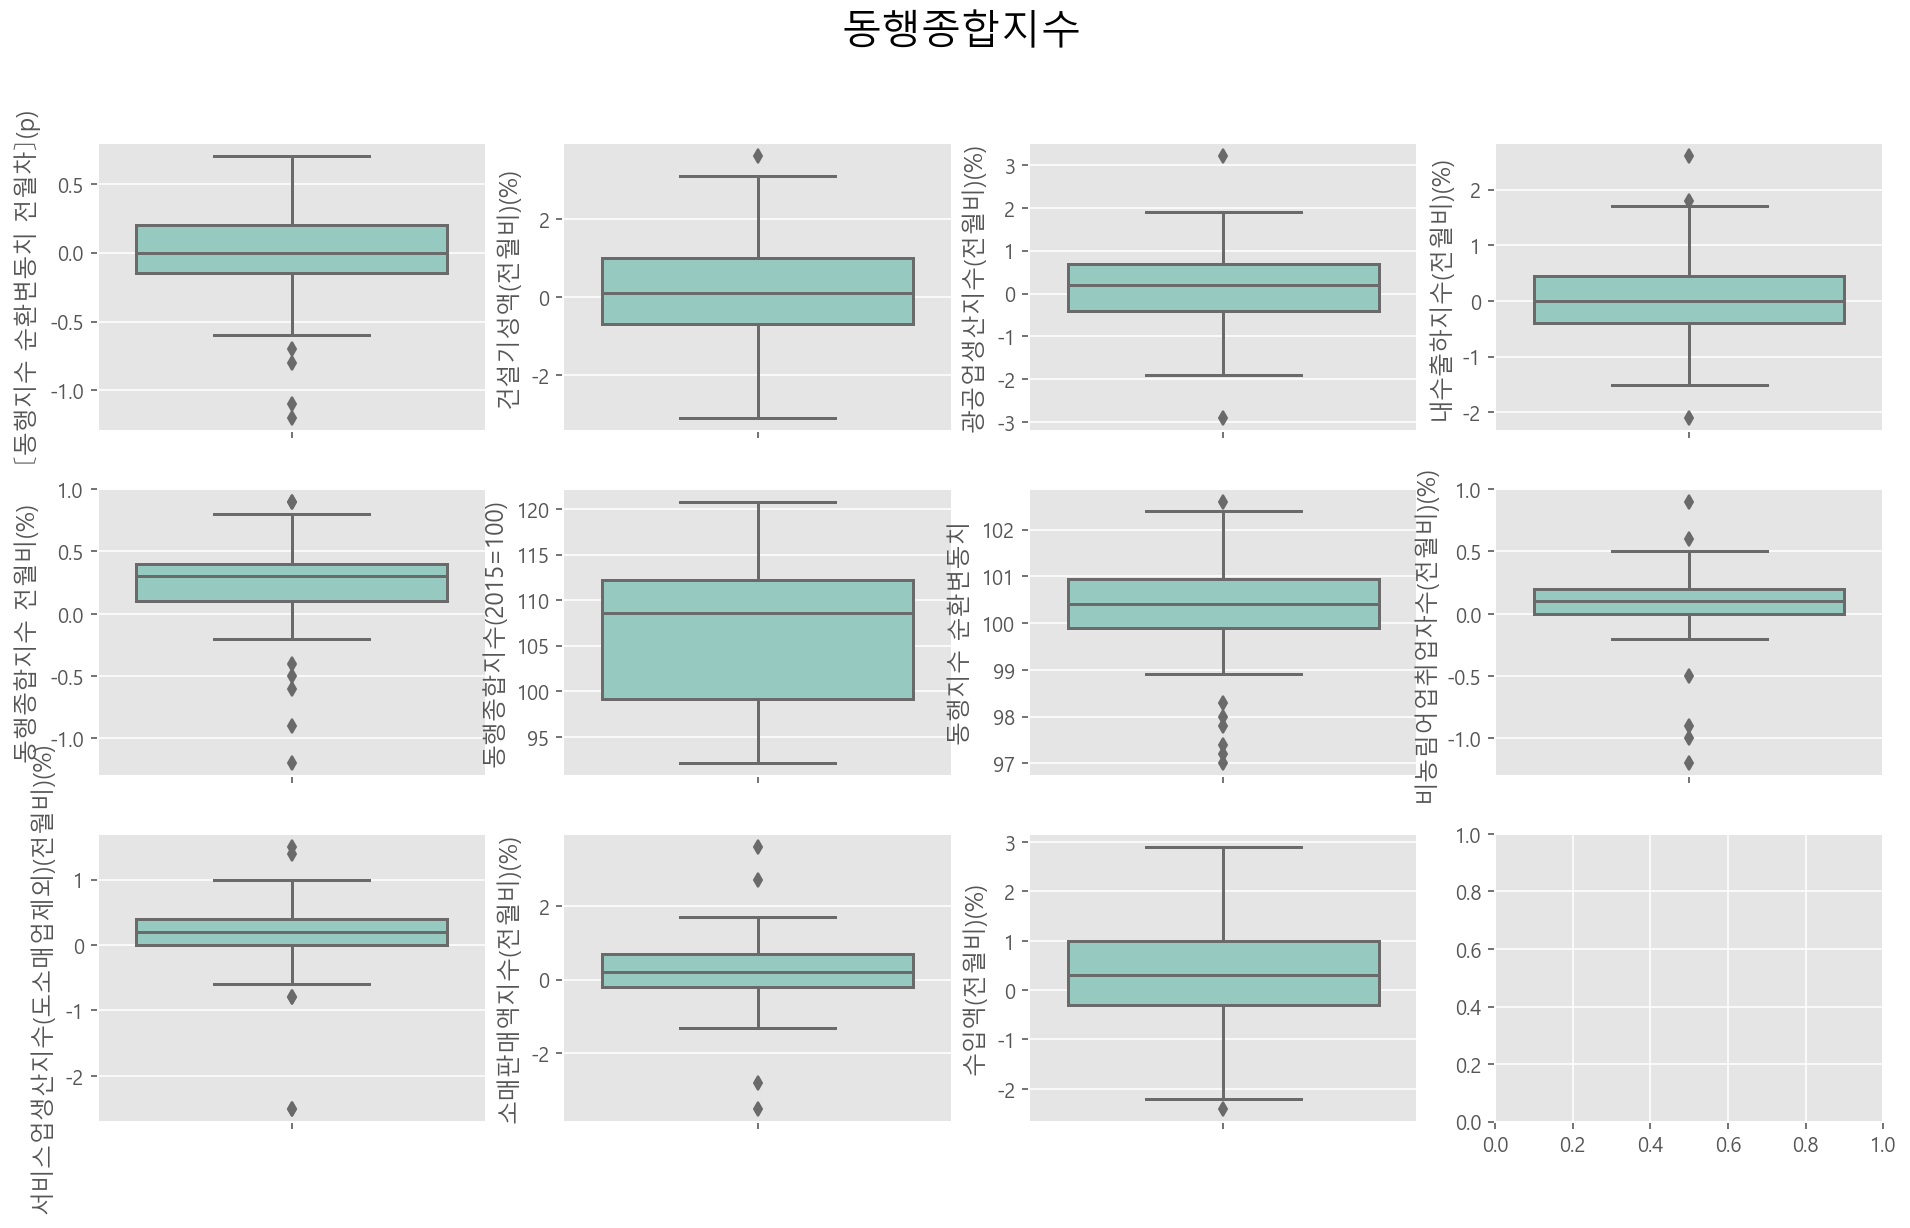

In [70]:
boxplotEDA(df_b_ct,df_b_ct.columns,3,4,'동행종합지수')

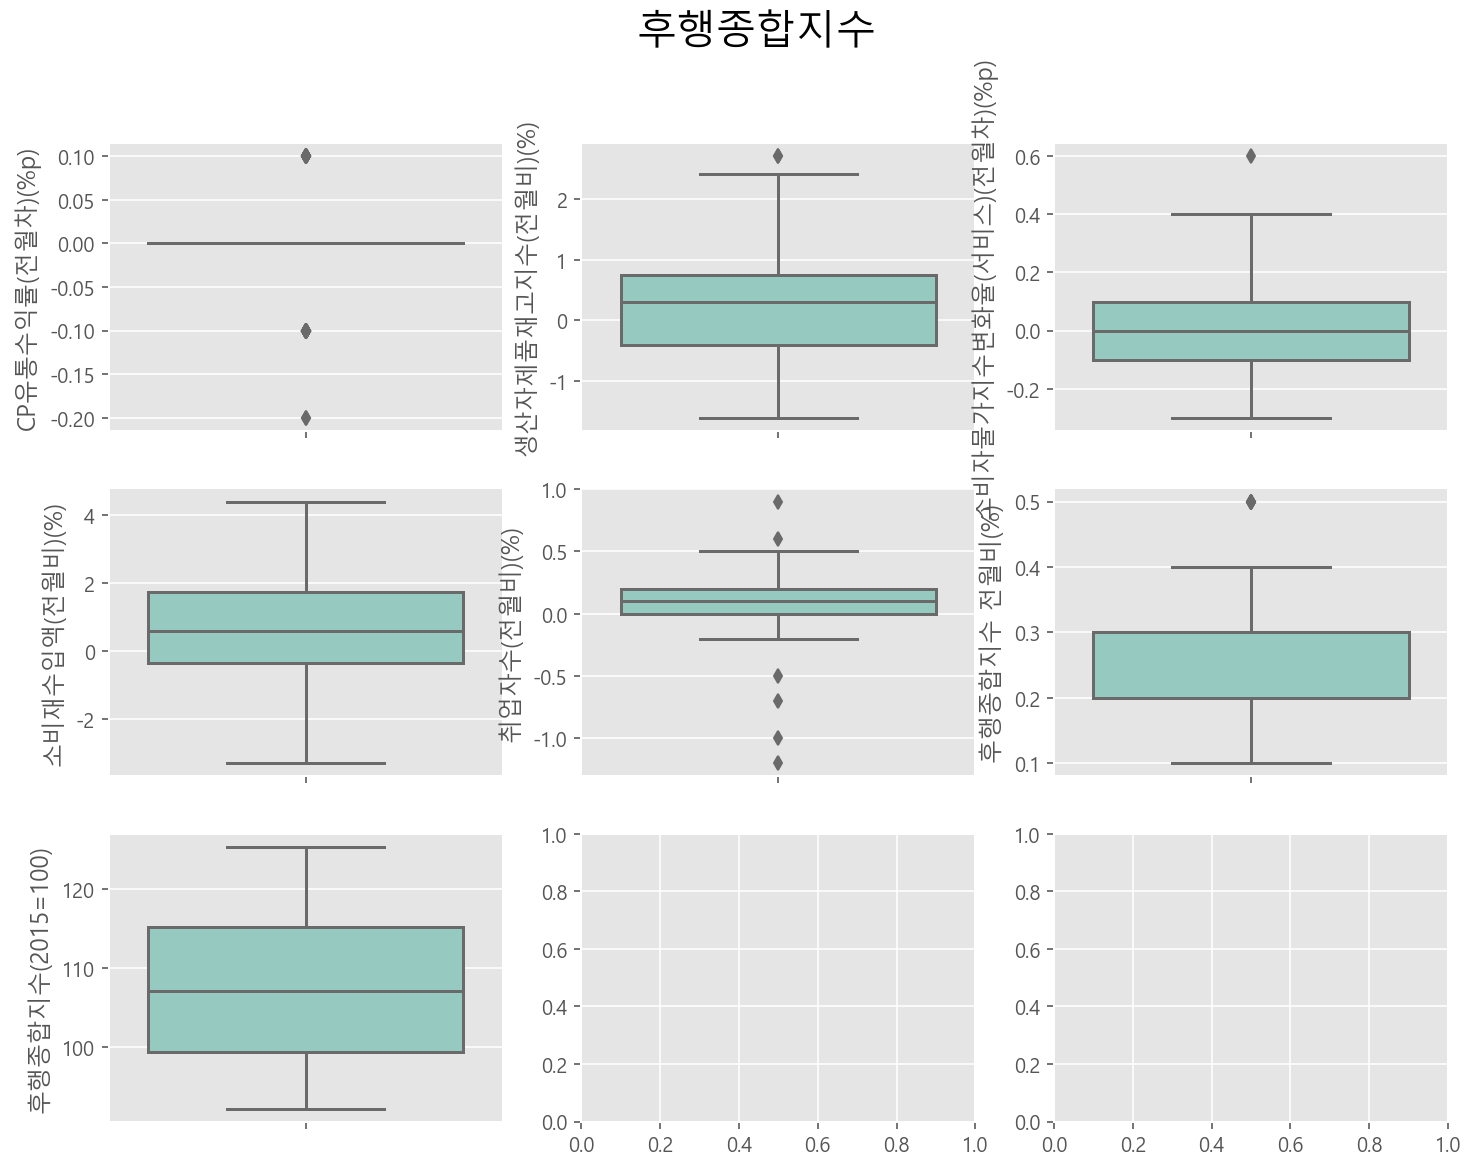

In [71]:
boxplotEDA(df_c_ct,df_c_ct.columns,3,3,'후행종합지수')

- 데이터셋 내에서 결측치는 발생되지 않았으며, 이상치는 측정 에러가 아닌, 해당 시각에 벌어진 사건에 의해 나타난 값이라고 판단하여 이상치를 따로 제거해주지 않고 분석에 포함하도록 하였다.

### 시각화(Visualization)

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_CI_ct.index,y=df_a_ct['선행종합지수(2015=100)'],
                 mode='lines+markers', name='선행종합지수(2015=100)'))
fig.add_trace(go.Scatter(x=df_CI_ct.index,y=df_CI_ct['후행종합지수(2015=100)'],
                 mode='lines+markers', name='후행종합지수(2015=100)'))
fig.add_trace(go.Scatter(x=df_CI_ct.index,y=df_CI_ct['동행종합지수(2015=100)'],
                 mode='lines+markers', name='동행종합지수(2015=100)'))
fig.add_vline(x=24,line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=84,line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=88,line_width=3, line_dash="dash", line_color="green")
fig.add_annotation(x=24, y=125,
            text="2015=100",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=84, y=125,
            text="Corona Virus 첫 확진자 발생",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=88, y=100,
            text="사회적 거리두기 시행에서 생활방역으로 전환",
            showarrow=True,
            arrowhead=1)
fig.update_xaxes(rangeslider_visible = True)
fig.update_layout(title='<b>경제종합지수(2015=100)</b>')
fig.show()

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_CI_ct.index,y=df_a_ct['선행지수 순환변동치'],
                 mode='lines+markers', name='선행지수 순환변동치'))
fig.add_trace(go.Scatter(x=df_CI_ct.index,y=df_CI_ct['동행지수 순환변동치'],
                 mode='lines+markers', name='동행지수 순환변동치'))
fig.add_vline(x=24,line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=84,line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=88,line_width=3, line_dash="dash", line_color="green")
fig.add_annotation(x=24, y=103,
            text="2015=100",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=84, y=103,
            text="Corona Virus 첫 확진자 발생",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=88, y=95,
            text="사회적 거리두기 시행에서 생활방역으로 전환",
            showarrow=True,
            arrowhead=1)
fig.update_xaxes(rangeslider_visible = True)
fig.update_layout(title='<b>순환변동치</b>')
fig.show()

2020.01월과 2021.05월을 기준으로 그래프의 개형이 크게 변화하기 시작함.   
- 2020.01.20 대한민국 코로나 첫 확진자 발생 : 2020.01 ~ 2020.05까지 경제종합지수가 급격하게 떨어짐.   
- 2020.05.05 대한민국 사회적 거리두기에서 생활방역으로 전환 : 2020.05 이후부터 경제종합지수가 급격하게 상승함.

## 3. 상관관계분석
경제심리지수를 선행,동행,후행종합지수 데이터셋에 병합시켜 함께 상관관계 분석을 시행

### 데이터 병합

In [152]:
# 데이터 병합 with 경제종합지수, 경제심리지수
df_a_temp = df_a_ct[df_a_ct.columns.difference(['경제심리지수(전월차)(p)'])]
df_a_temp = pd.concat([df_a_temp, df_esi_ct],axis=1,join='inner')
df_b_temp = pd.concat([df_b_ct, df_esi_ct],axis=1,join='inner')
df_c_temp = pd.concat([df_c_ct, df_esi_ct],axis=1,join='inner')

#### 상관관계 히트맵 분석

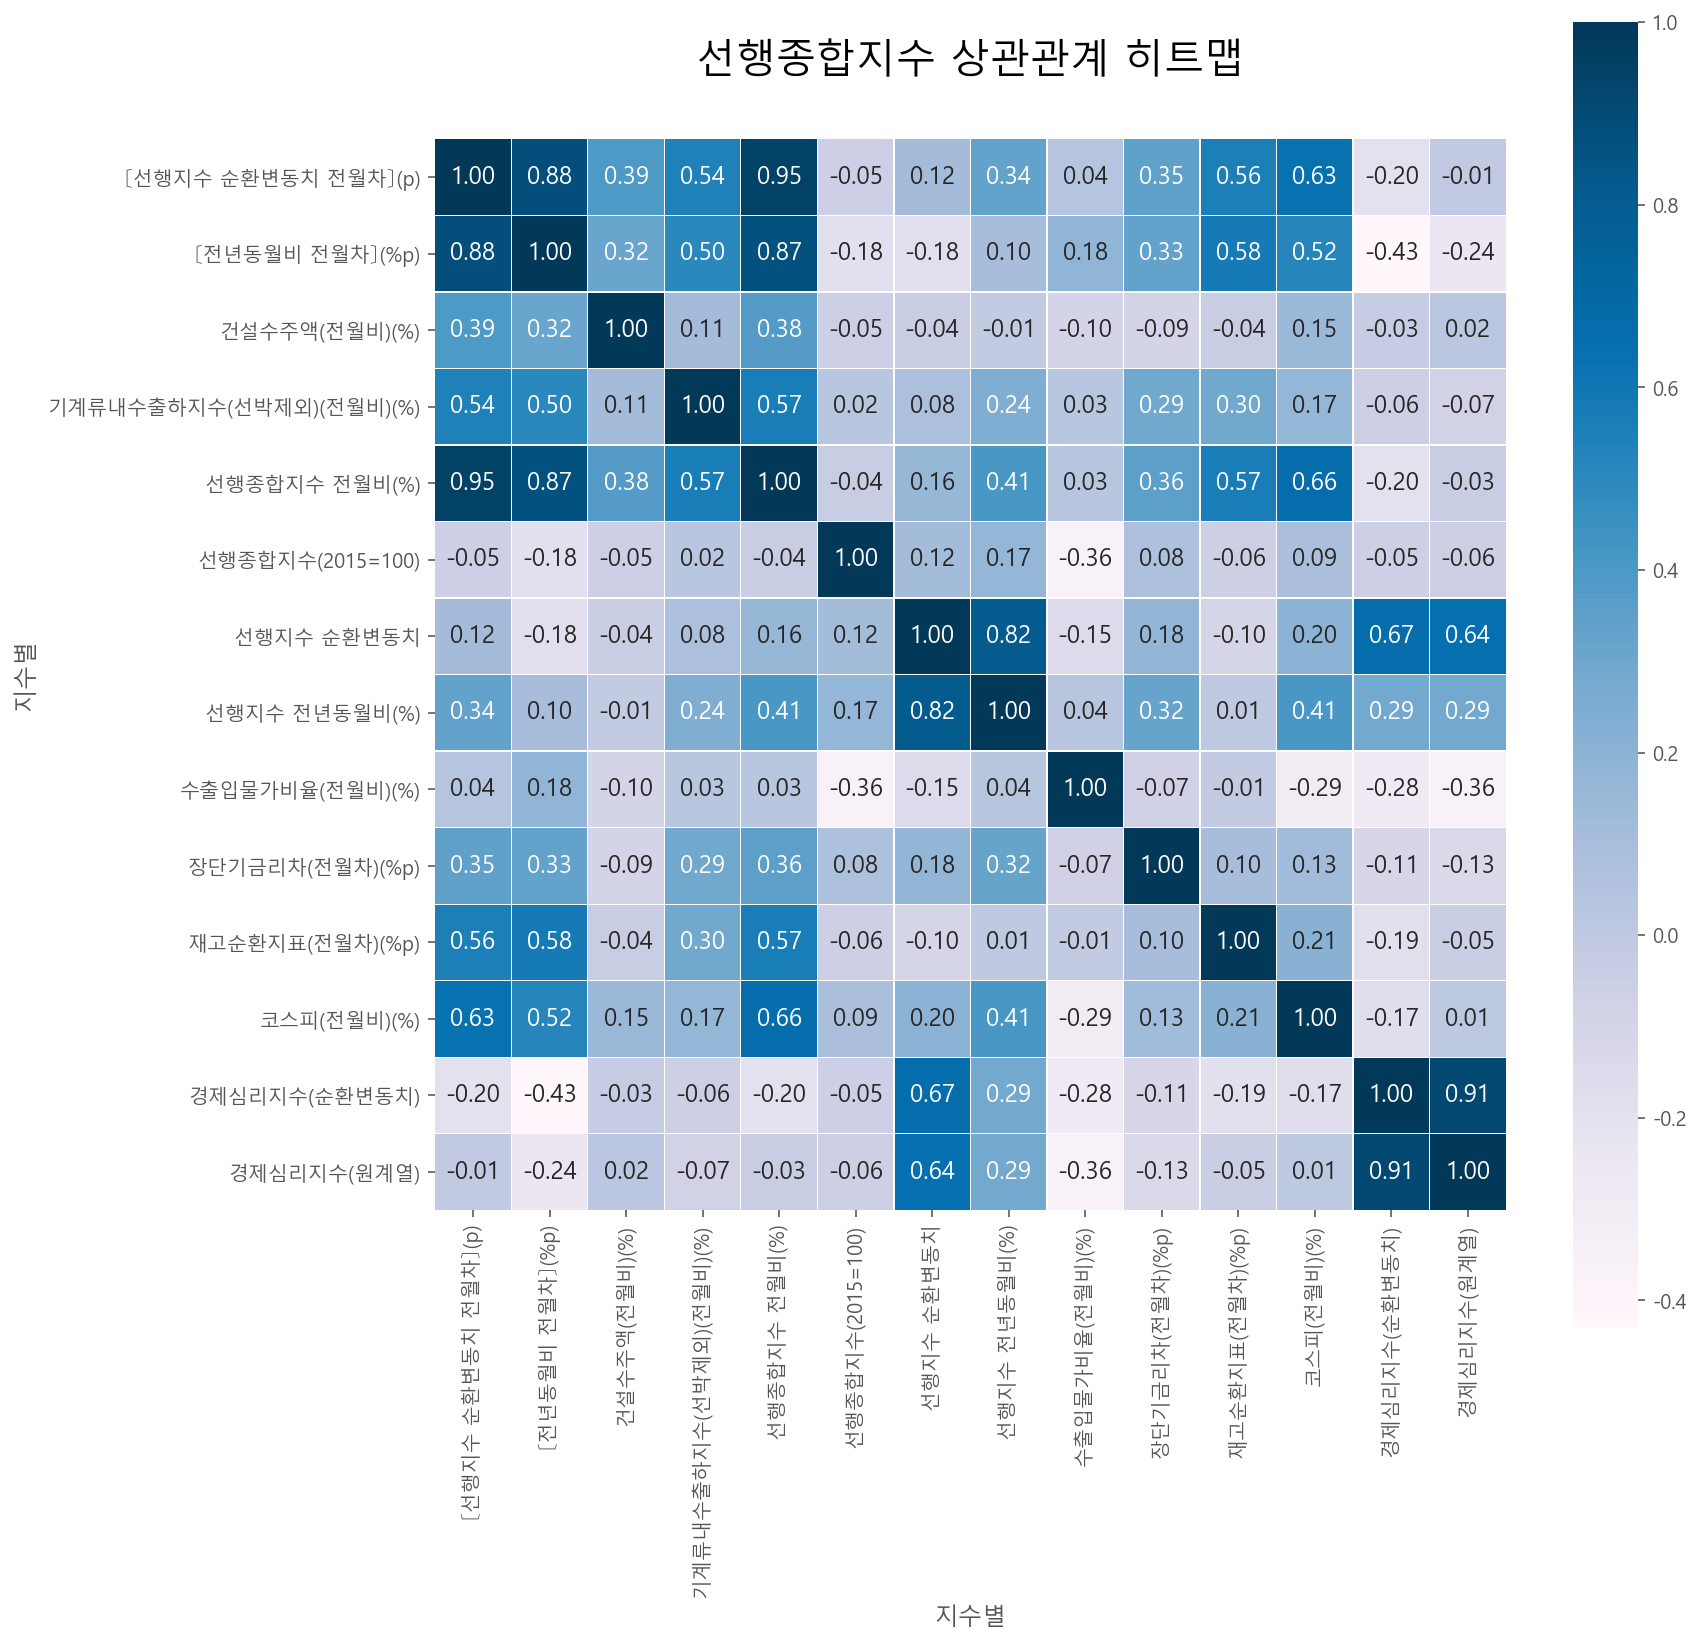

In [150]:
corr_matrix(df_a_temp, df_a_temp.columns, '선행종합지수 상관관계 히트맵')

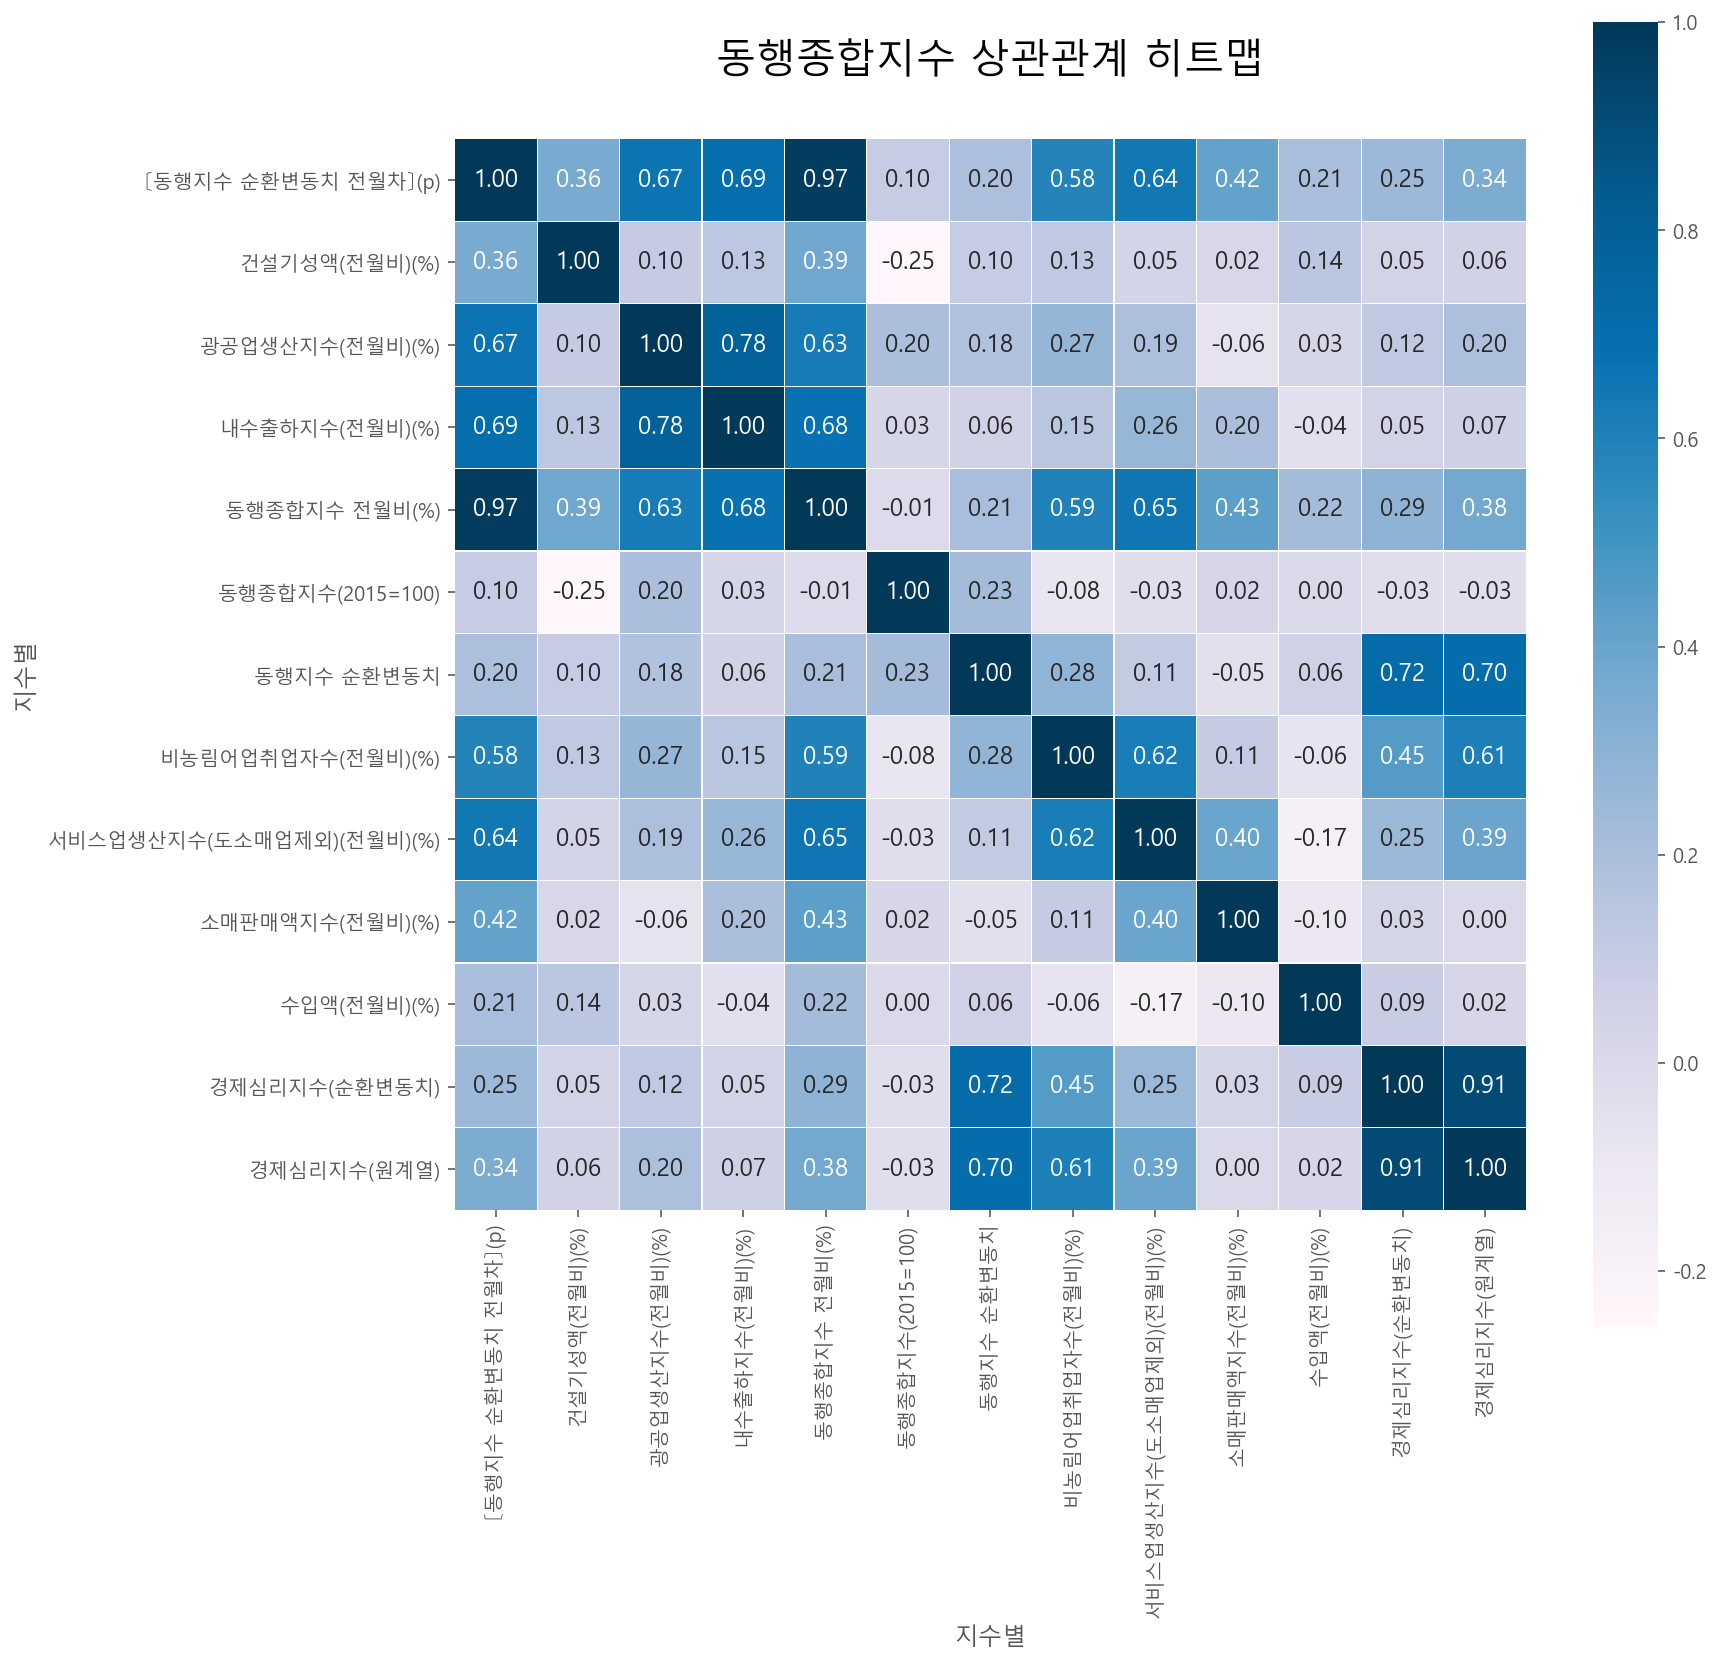

In [153]:
corr_matrix(df_b_temp, df_b_temp.columns, '동행종합지수 상관관계 히트맵')

- 동행종합지수는 현재 경기에 동행하는 지표인 만큼, 산업생산지수와 관련이 많다. 예를 들어, 광공업생산지수, 내수출하지수, 서비스업생산자수
- 2020.01 ~ 2020.05 사이를 기준으로 코로나 19에 가장 영향을 많이 받은 종목을 분석

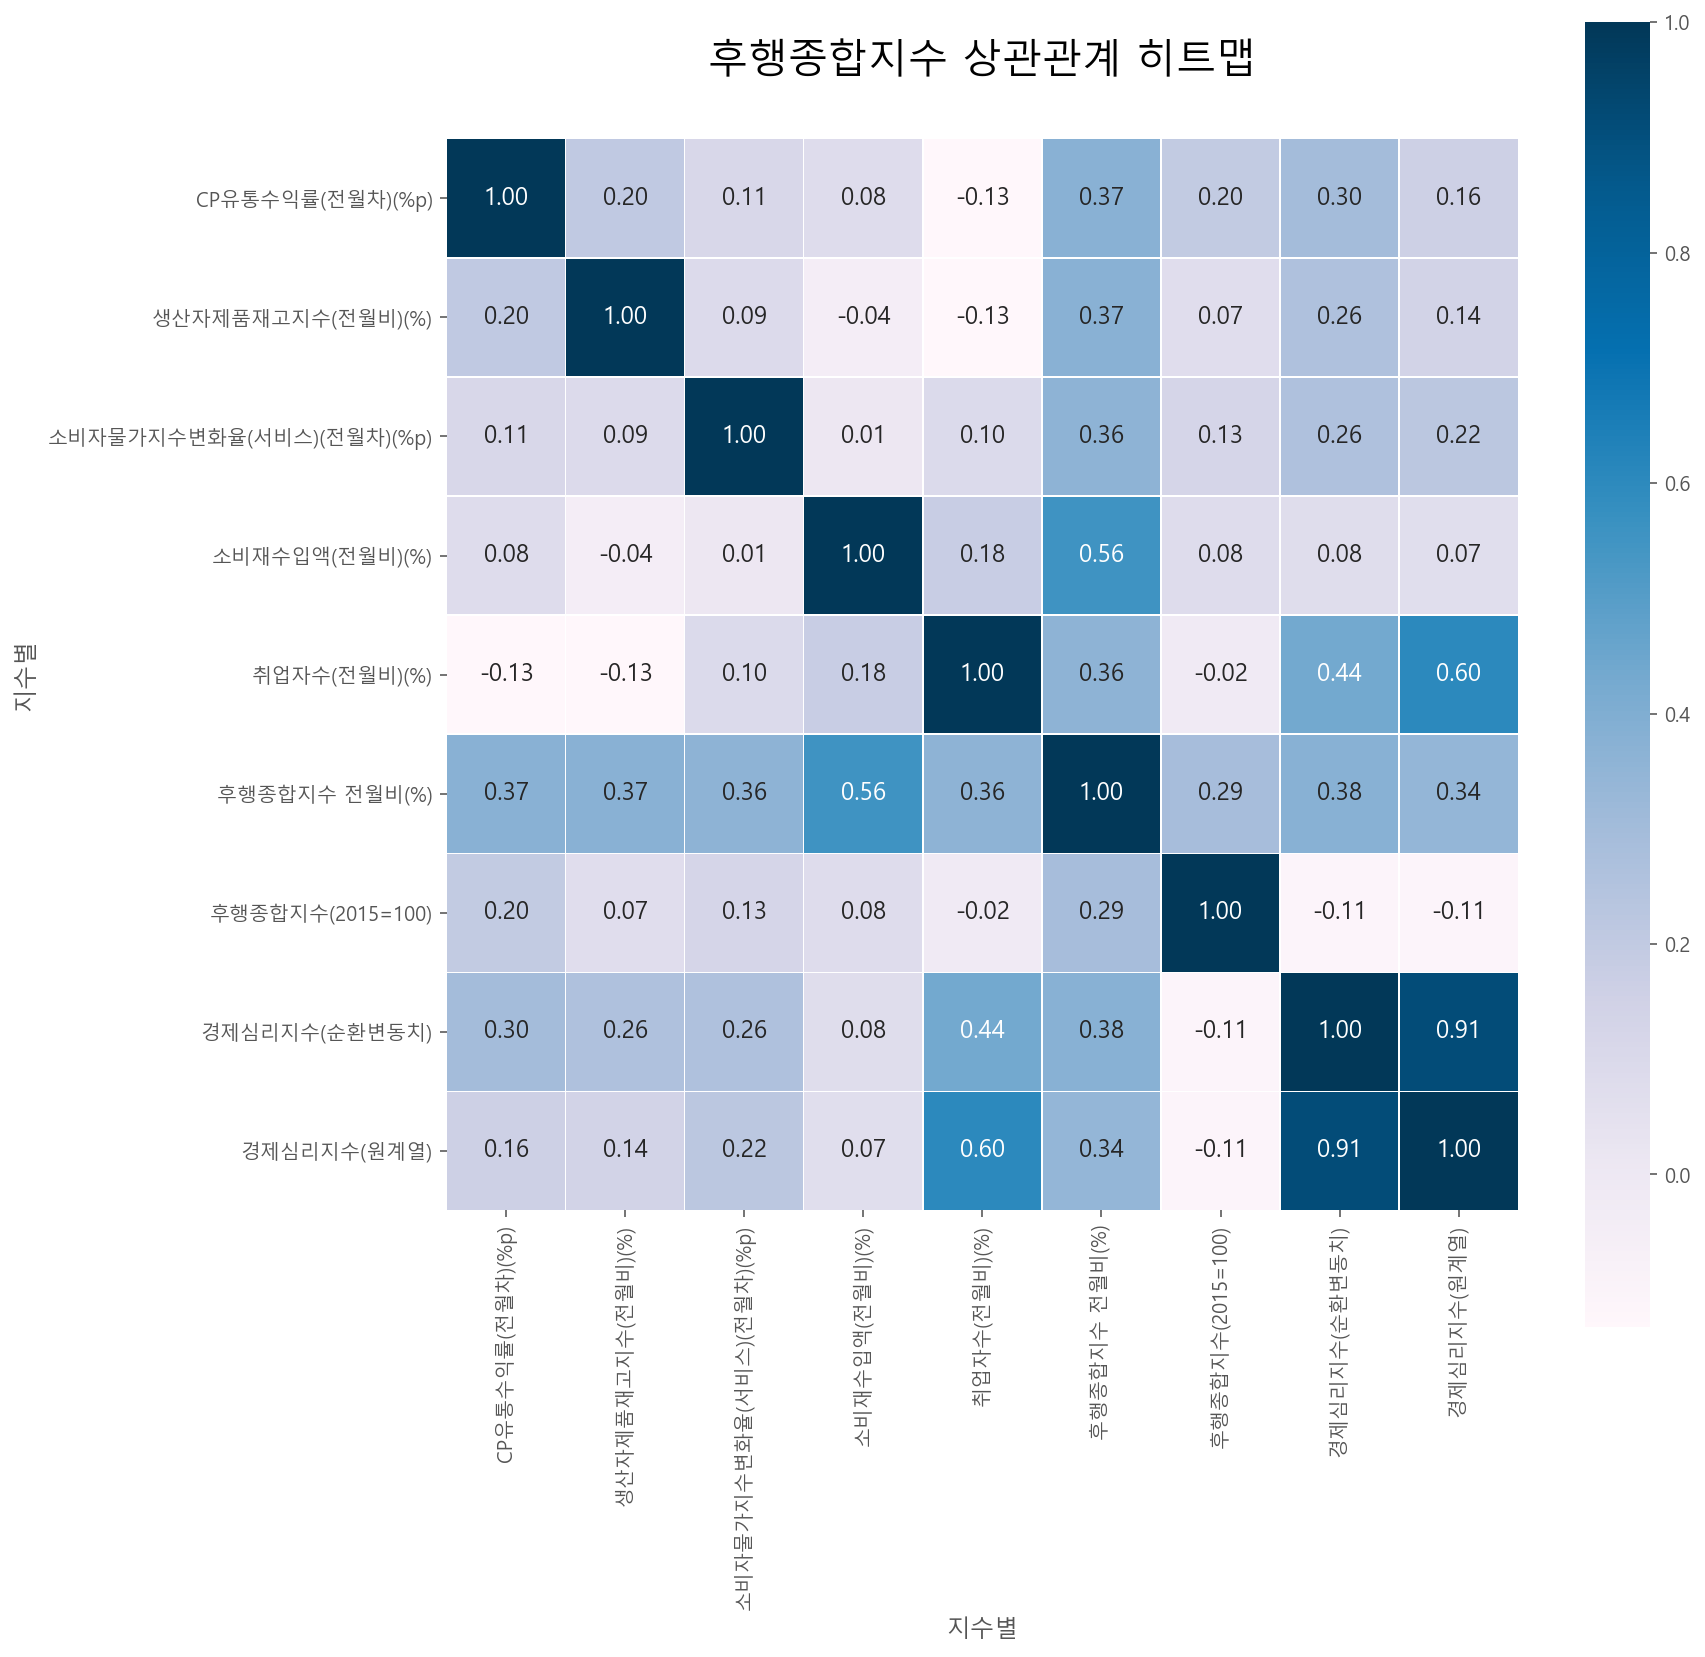

In [155]:
corr_matrix(df_c_temp, df_c_temp.columns, '후행종합지수 상관관계 히트맵')

## 4. 코로나 집중 영향 구간 심층분석
집중분석 구간 : 2018.03 ~ 2022.03   
주요사건
- 2020.01 첫 코로나 확진
- 2020.05 생활방역 전환

In [23]:
# 집중구간 데이터셋 정의
df_a_deep = df_a_ct.loc['2018.03':'2022.03',:]
df_b_deep = df_b_ct.loc['2018.03':'2022.03',:]
df_c_deep = df_c_ct.loc['2018.03':'2022.03',:]
df_CI_deep = df_CI_ct.loc['2018.03':'2022.03',:]

print('df_a_deep :',df_a_deep.shape)
print('df_b_deep :',df_b_deep.shape)
print('df_c_deep :',df_c_deep.shape)
print('df_CI_deep :',df_CI_deep.shape)

df_a_deep : (49, 13)
df_b_deep : (49, 11)
df_c_deep : (49, 7)
df_CI_deep : (49, 12)


### 동행종합지수 집중구간 분석
주요특성 : 총 6종
- 건설기성액 : 건설업체의 국내공사 현장별 시공 실적 (건설투자액)   
- 광공업생산지수 : 광업, 제조업, 전기 · 가스 · 증기 및 수도사업을 대상으로한 생산실적   
- 비농림어업취업자수 : 농업, 어업 등을 제외한 2차산업 이상 산업의 취업자수   
- 서비스업생산지수 : 서비스업의 성장세를 가늠하는 핵심지표   
- 소매판매액지수 : 뱍화점, 대형마트 등 전문소매점 등에서 조사되는 소비통계   
- 수입액 : 수입과 관련된 지표   
   
<b> 위 특성 중 코로나 19 주요사건에 가장 크게 영향을 받은 세 가지 특성 추출!!

In [88]:
df_b_deep.columns[[1,2,7,8,9,10]]

Index(['건설기성액(전월비)(%)', '광공업생산지수(전월비)(%)', '비농림어업취업자수(전월비)(%)',
       '서비스업생산지수(도소매업제외)(전월비)(%)', '소매판매액지수(전월비)(%)', '수입액(전월비)(%)'],
      dtype='object', name='지수별')

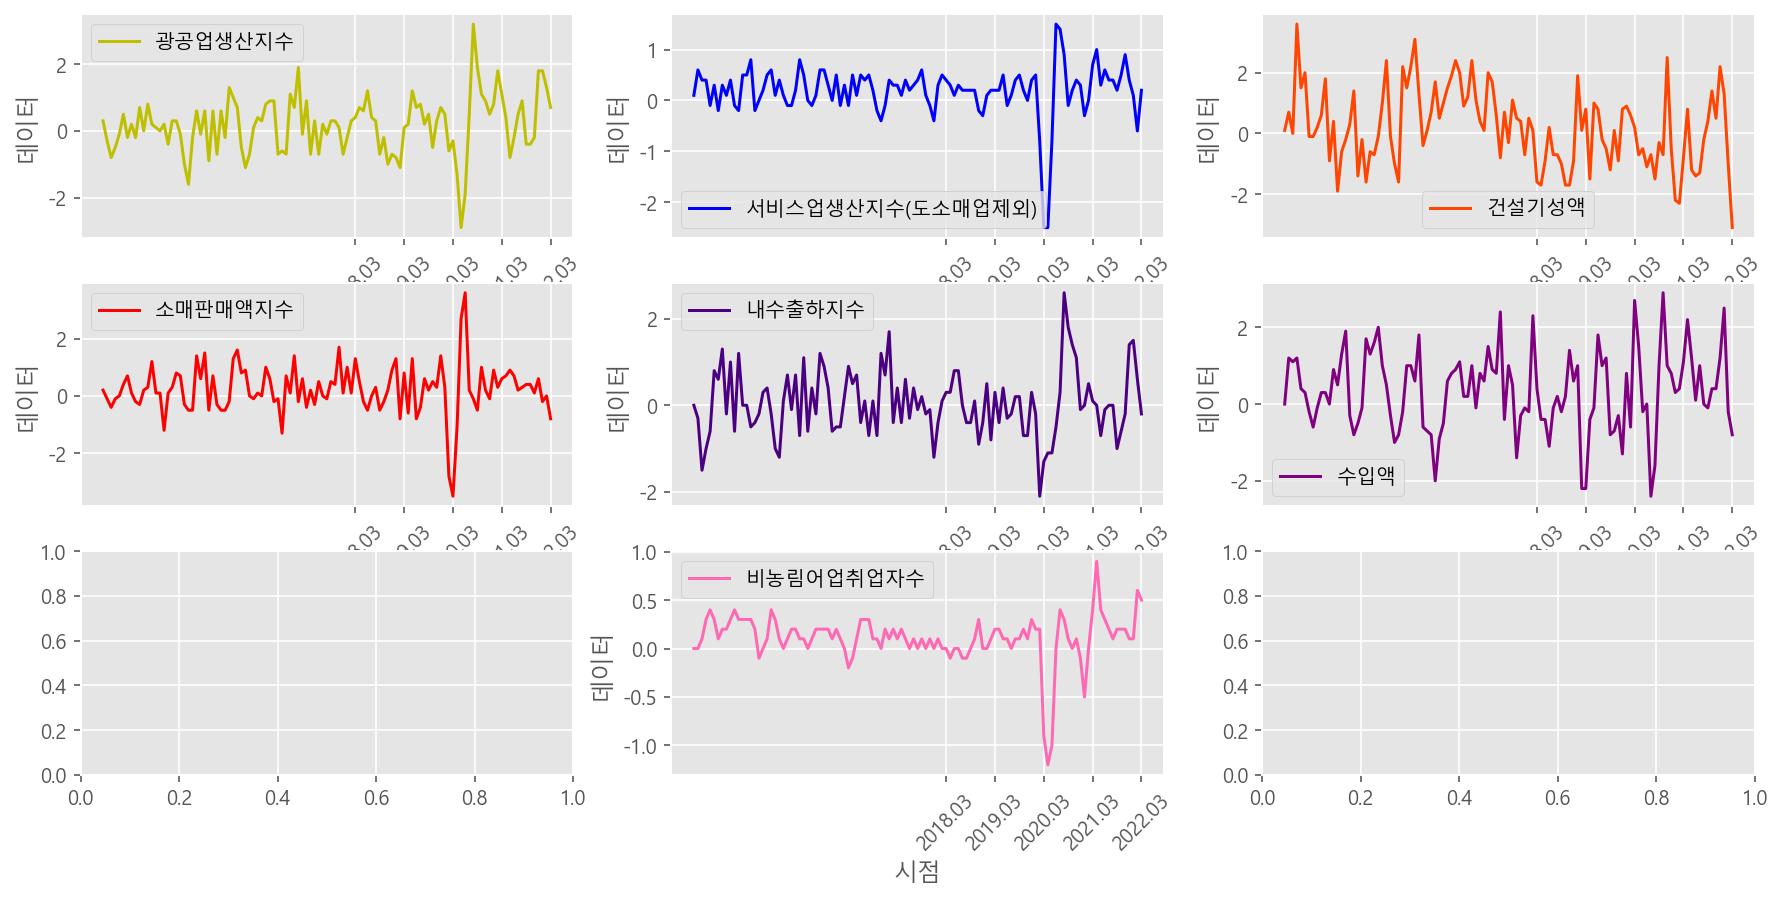

In [91]:
# 동행종합지수 전체특성 Subplot 시각화
# plt.axvline(x=2019, ymin=-1.0, ymax=1.5, color="pink")
fig, ax = plt.subplots(3,3, figsize=(15,7), sharex=False, sharey=False)
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "광공업생산지수(전월비)(%)"], label="광공업생산지수", ci=None, ax=ax[0,0], color="y")
ax[0,0].tick_params(axis="x", rotation=45)
ax[0,0].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "서비스업생산지수(도소매업제외)(전월비)(%)"], label="서비스업생산지수(도소매업제외)", ci=None, ax=ax[0,1], color="blue")
ax[0,1].tick_params(axis="x", rotation=45)
ax[0,1].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "건설기성액(전월비)(%)"], label="건설기성액", ci=None, ax=ax[0,2], color="orangered")
ax[0,2].tick_params(axis="x", rotation=45)
ax[0,2].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "소매판매액지수(전월비)(%)"], label="소매판매액지수", ci=None, ax=ax[1,0], color="r")
ax[1,0].tick_params(axis="x", rotation=45)
ax[1,0].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "내수출하지수(전월비)(%)"], label="내수출하지수", ci=None, ax=ax[1,1], color="indigo")
ax[1,1].tick_params(axis="x", rotation=45)
ax[1,1].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "수입액(전월비)(%)"], label="수입액", ci=None, ax=ax[1,2], color="purple")
ax[1,2].tick_params(axis="x", rotation=45)
ax[1,2].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
sns.lineplot(x="시점", y="데이터", data=df_b[df_b["지수별"] == "비농림어업취업자수(전월비)(%)"], label="비농림어업취업자수", ci=None, ax=ax[2,1], color="hotpink")
ax[2,1].tick_params(axis="x", rotation=45)
ax[2,1].set_xticks(["2018.03", "2019.03", "2020.03", "2021.03", "2022.03"])
plt.show()

In [92]:
deep_lineplot(df_b_deep, '광공업생산지수(전월비)(%)')

In [93]:
deep_lineplot(df_b_deep, '비농림어업취업자수(전월비)(%)')

In [94]:
deep_lineplot(df_b_deep, '서비스업생산지수(도소매업제외)(전월비)(%)')

In [95]:
deep_lineplot(df_b_deep, '건설기성액(전월비)(%)')

[동행종합지수 주요특성 분석 결과]
- 광공업생산지수, 비농림어업취업자수, 서비스업생산지수 이상 세 특성의 그래프를 보면 전체추세를 완전히 벗어나는 형태가 코로나19 집중영향구간에서 나타나는 것을 볼 수 있는데, 이는 위 세 특성이 코로나19 관련 사건에 가장 민감한 반응을 보인다는 의미로 해석될 수 있다.
- 비농림어업취업자수와 서비스업생산지수는 2차산업 이상의 산업지표를 포함한다는 점에서 사실상 다중공선성이 존재하는 변수쌍으로 이해할 수 있다. 실제 상관계수도 0.62로 높게 나타나는 모습을 보였다.   
- 건설기성액에 경우는, 건설투자라던가 시공계획수립 등 건설산업이 단기 사건으로 인해선 쉽게 영향을 받지 않는다는 점이 반영된 것 같다.
- 최종적으로 코로나19에 가장 직접적인 영향을 받은 종목은 서비스업생산지수 > 광공업생산지수 > 건설지수 순으로 분석되었다.

## 5. 선행,후행,동행 종합지수 간 분석

In [96]:
df_CI_ct.columns

Index(['〔동행지수 순환변동치 전월차〕(p)', '〔선행지수 순환변동치 전월차〕(p)', '〔전년동월비 전월차〕(%p)',
       '동행종합지수 전월비(%)', '동행종합지수(2015=100)', '동행지수 순환변동치', '선행종합지수 전월비(%)',
       '선행종합지수(2015=100)', '선행지수 순환변동치', '선행지수 전년동월비(%)', '후행종합지수 전월비(%)',
       '후행종합지수(2015=100)'],
      dtype='object', name='지수별')

In [97]:
df_CI_cr = df_CI_ct[['선행종합지수 전월비(%)','후행종합지수 전월비(%)','동행종합지수 전월비(%)']]
print('df_CI_cr.shape :',df_CI_cr.shape)
df_CI_cr.head()

df_CI_cr.shape : (111, 3)


지수별,선행종합지수 전월비(%),후행종합지수 전월비(%),동행종합지수 전월비(%)
,,,
2013.01,0.2,0.3,0.1
2013.02,0.3,0.3,0.3
2013.03,0.3,0.2,0.0
2013.04,0.3,0.3,0.3
2013.05,0.3,0.2,0.3


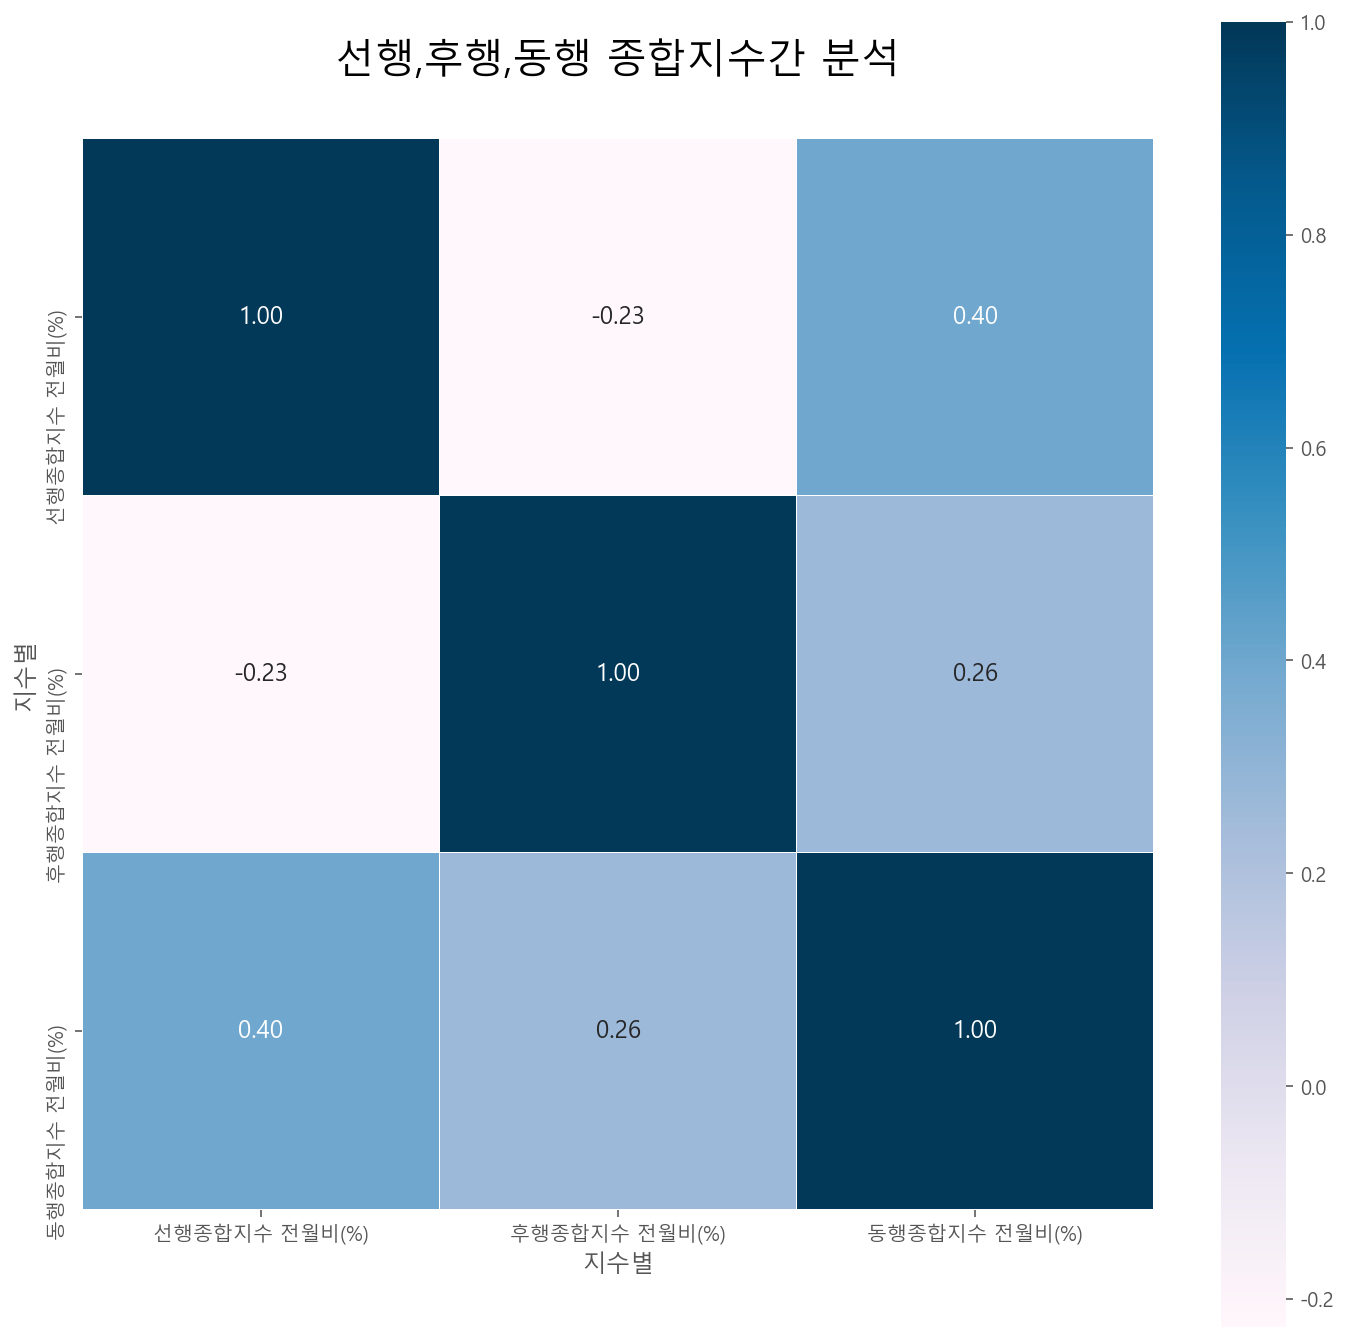

In [98]:
corr_matrix(df_CI_cr, df_CI_cr.columns, '선행,후행,동행 종합지수간 분석')

- 선행, 후행, 동행은 t 시점을 기준으로 미래,현재,과거의 경제 상태를 평가하는 지표이다. 사실 세 지표 모두 같은 현상을 탐색한다는 공통점이 있지만, 최고 상관계수 0.40으로 강한 상관관계를 보이지는 않는다.

## 6. 경제종합지수와 경제심리지수 비교

### 전처리 (경제종합지표 + 심리지수)

In [123]:
## 분석 기간 설정: 2018년 3월 ~ 2022년 3월
target_period = ["2018.03.01", "2022.03.31"]
df_CI = df_CI[(pd.to_datetime(df_CI["시점"]) >= target_period[0]) & (pd.to_datetime(df_CI["시점"]) < target_period[1])]
df_esi = df_esi[(pd.to_datetime(df_esi["시점"]) >= target_period[0]) & (pd.to_datetime(df_esi["시점"]) < target_period[1])]

In [124]:
## df_CI_SI = df_CI + df_esi
df_CI_SI = pd.concat([df_CI, df_esi])
df_CI_SI.shape

(686, 3)

In [125]:
df_CI_SI["지수별"].unique()

array(['선행종합지수(2015=100)', '선행종합지수 전월비(%)', '선행지수 순환변동치',
       '〔선행지수 순환변동치 전월차〕(p)', '선행지수 전년동월비(%)', '〔전년동월비 전월차〕(%p)',
       '동행종합지수(2015=100)', '동행종합지수 전월비(%)', '동행지수 순환변동치',
       '〔동행지수 순환변동치 전월차〕(p)', '후행종합지수(2015=100)', '후행종합지수 전월비(%)',
       '경제심리지수(원계열)', '경제심리지수(순환변동치)'], dtype=object)

### 원계열과 순환변동치 위주

In [126]:
# 원계열 및 순환변동치지수에 해당하는 행만 활용
CI_idx = df_CI_SI["지수별"].str.endswith("(2015=100)")# 종합지수 Composite Index
CCI_idx = df_CI_SI["지수별"].str.endswith("순환변동치") # 순환변동치 Cyclical Component Index
SI_idx = df_CI_SI["지수별"] == "경제심리지수(원계열)" # 심리지수 (Economic) Sentiment Index
CSI_idx = df_CI_SI["지수별"] == "경제심리지수(순환변동치)" # 경제심리지수 순환변동치 Cyclical Component of (Economic) Sentiment Index

In [127]:
df_CI_SI_idx = df_CI_SI[CI_idx | CCI_idx | SI_idx | CSI_idx].copy()
print('df_CI_SI_idx :',df_CI_SI_idx.shape)
df_CI_SI_idx.head()

df_CI_SI_idx : (343, 3)


,시점,지수별,데이터
1922,2018.03,선행종합지수(2015=100),111.8
1931,2018.03,선행지수 순환변동치,100.8
1935,2018.03,동행종합지수(2015=100),110.2
1944,2018.03,동행지수 순환변동치,101.9
1946,2018.03,후행종합지수(2015=100),109.3


In [130]:
## 2018년 3월을 0으로 표준화
value_baseline = df_CI_SI_idx[df_CI_SI_idx["시점"] == "2018.03"].rename(columns = {"데이터" : "기준치"}).drop(columns= ["시점"])
print('value_baseline :',value_baseline.shape)
value_baseline.head()

value_baseline : (7, 2)


,지수별,기준치
1922,선행종합지수(2015=100),111.8
1931,선행지수 순환변동치,100.8
1935,동행종합지수(2015=100),110.2
1944,동행지수 순환변동치,101.9
1946,후행종합지수(2015=100),109.3


In [132]:
# df_CI_SI_reg = regularized df_CI_SI_idx
df_CI_SI_idx_reg = pd.merge(df_CI_SI_idx, value_baseline, how = "left")
df_CI_SI_idx_reg["변환치"] = df_CI_SI_idx_reg["데이터"] / df_CI_SI_idx_reg["기준치"] - 1
df_CI_SI_idx_reg["지수별"] = df_CI_SI_idx_reg["지수별"].str.replace(r"\(2015=100\)", "") ## 2015=100 문자열 제거
df_CI_SI_idx_reg = df_CI_SI_idx_reg.drop(columns = ["데이터", "기준치"]).rename(columns = {"변환치" : "데이터"}) ## 변환치를 데이터로 변경
print('df_CI_SI_idx_reg :',df_CI_SI_idx_reg.shape)
df_CI_SI_idx_reg.head()

df_CI_SI_idx_reg : (343, 3)


,시점,지수별,데이터
0,2018.03,선행종합지수,0.0
1,2018.03,선행지수 순환변동치,0.0
2,2018.03,동행종합지수,0.0
3,2018.03,동행지수 순환변동치,0.0
4,2018.03,후행종합지수,0.0


### 시각화
- 시각화를 위한 Crosstab

In [134]:
ct_CI_SI_idx = cross_tab(df_CI_SI_idx) # 표준화 데이터
print('ct_CI_SI_idx :',ct_CI_SI_idx.shape)
ct_CI_SI_idx.head()

ct_CI_SI_idx : (49, 7)


지수별,경제심리지수(순환변동치),경제심리지수(원계열),동행종합지수(2015=100),동행지수 순환변동치,선행종합지수(2015=100),선행지수 순환변동치,후행종합지수(2015=100)
,,,,,,,
2018.03,99.5,97.9,110.2,101.9,111.8,100.8,109.3
2018.04,99.0,99.6,110.3,101.9,111.8,100.4,109.6
2018.05,98.6,101.7,110.5,101.8,112.1,100.4,109.9
2018.06,98.2,100.2,110.7,101.8,112.3,100.3,110.2
2018.07,97.7,95.5,110.8,101.6,112.5,100.2,110.5


In [135]:
ct_CI_SI_idx_reg = cross_tab(df_CI_SI_idx_reg) # 표준화 데이터
print('ct_CI_SI_idx_reg :',ct_CI_SI_idx_reg.shape)
ct_CI_SI_idx_reg.head()

ct_CI_SI_idx_reg : (49, 7)


지수별,경제심리지수(순환변동치),경제심리지수(원계열),동행종합지수,동행지수 순환변동치,선행종합지수,선행지수 순환변동치,후행종합지수
,,,,,,,
2018.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018.04,-0.005025,0.017365,0.000907,0.000000,0.000000,-0.003968,0.002745
2018.05,-0.009045,0.038815,0.002722,-0.000981,0.002683,-0.003968,0.005489
2018.06,-0.013065,0.023493,0.004537,-0.000981,0.004472,-0.004960,0.008234
2018.07,-0.018090,-0.024515,0.005445,-0.002944,0.006261,-0.005952,0.010979


In [136]:
# 전월차 데이터
ct_CI_SI_idx_diff = ct_CI_SI_idx.diff().dropna()
ct_CI_SI_idx_diff.columns = ct_CI_SI_idx_diff.columns + "_전월차"
print('ct_CI_SI_idx_diff :',ct_CI_SI_idx_diff.shape)
ct_CI_SI_idx_diff.head()

ct_CI_SI_idx_diff : (48, 7)


지수별,경제심리지수(순환변동치)_전월차,경제심리지수(원계열)_전월차,동행종합지수(2015=100)_전월차,동행지수 순환변동치_전월차,선행종합지수(2015=100)_전월차,선행지수 순환변동치_전월차,후행종합지수(2015=100)_전월차
,,,,,,,
2018.04,-0.5,1.7,0.1,0.0,0.0,-0.4,0.3
2018.05,-0.4,2.1,0.2,-0.1,0.3,0.0,0.3
2018.06,-0.4,-1.5,0.2,0.0,0.2,-0.1,0.3
2018.07,-0.5,-4.7,0.1,-0.2,0.2,-0.1,0.3
2018.08,-0.4,1.1,0.1,-0.1,-0.1,-0.3,0.2


In [137]:
lineplot(ct_CI_SI_idx, ct_CI_SI_idx.columns, '경제종합지표 및 경제심리지수 (2015=100)')

In [138]:
lineplot(ct_CI_SI_idx_reg, ct_CI_SI_idx_reg.columns, '경제종합지표 및 경제심리지수 (2013.03=0)')

In [139]:
lineplot(ct_CI_SI_idx_diff, ct_CI_SI_idx_diff.columns, '경제종합지표 및 경제심리지수 전월차')

* 종합지수의 추세가 순환변동치에 비해 급격하다. 
* 경제심리지수의 경우 경제종합지수에 비해 변동폭이 가파르다.
* 경제심리지수의 추세가 종합지수나 순환변동치가 크게 반영되지 않는 것 같다.
* 경제심리지수의 추세가 종합지수나 순환변동치가 크게 반영되지 않는 것 같다.

        - 경제심리지표와 관련있을 수 있는 경제세부지표와의 추가적인 분석이 필요하다.

### 선행종합지수 내 세부 지수(코스피 / 수출입물가비율)와 심리지수 분석   
선행종합지수 데이터프레임 연도별로 총 네개의 데이터 프레임으로 나누기

In [141]:
df_a_ct_2018 = df_a_ct[(df_a_ct.index >= '2018.03') &(df_a_ct.index < '2019.03')] #2018.03 ~ 2019.02
df_a_ct_2019 = df_a_ct[(df_a_ct.index >= '2019.03') &(df_a_ct.index < '2020.03')] #2019.03 ~ 2020.02
df_a_ct_2020 = df_a_ct[(df_a_ct.index >= '2020.03') &(df_a_ct.index < '2021.03')] #2020.03 ~ 2021.02
df_a_ct_2021 = df_a_ct[(df_a_ct.index >= '2021.03') &(df_a_ct.index <= '2022.03')] #2021.03 ~ 2022.03

#### 코스피(전월비) 와 경제심리 지수 비교해보기     
코스피와 경제심리지수의 변동 추세의 유사성을 확인하기 위해 두개의 컬럼만을 추출하여 연도별로 추세를 비교하기

In [142]:
lineplot(df_a_ct_2018, ['코스피(전월비)(%)', '경제심리지수(전월차)(p)'],
         '코스피 & 경제심리지수 추세 비교 \n (2018.03 ~ 2019.02)  ')

In [143]:
lineplot(df_a_ct_2019, ['코스피(전월비)(%)', '경제심리지수(전월차)(p)'],
         '코스피 & 경제심리지수 추세 비교 \n (2019.03 ~ 2020.02)  ')

In [144]:
lineplot(df_a_ct_2020, ['코스피(전월비)(%)', '경제심리지수(전월차)(p)'],
         '코스피 & 경제심리지수 추세 비교 \n (2020.03 ~ 2021.02)  ')

In [145]:
lineplot(df_a_ct_2021, ['코스피(전월비)(%)', '경제심리지수(전월차)(p)'],
         '코스피 & 경제심리지수 추세 비교 \n (2021.03 ~ 2022.03)  ')

결과를 확인해보자면
* 경제심리지수가 코스피가 함께 움직이는 경향을 보인다.
* 2020년 2월쯤 급락하는 추세를 보이는데, 코로나의 영향으로 추정해볼 수 있다.
* 2020년 2월 이후 코로나에 대한 규제와 방안들이 생겨나면서 점차 회복하는 경우도 있었고, 하락하는 경우도 있었음을 확인해볼 수 있다.  

즉, **경제심리지수**는 '기업'과 소비자 모두를 포함해 민간이 경제 상황에 대해 어떻게 생각하는지를 종합적으로 파악하는 지표로, 대한민국에서 거래되는 수많은 주식의 가격, 정확하게 말하면 유가증권시장에서 거래되는 모든 주식의 가격을 나타내는 **코스피**와 양의 상관관계가 있다는 것을 알 수 있다.

#### 코스피(전월비) 와 경제심리 지수 비교해보기

In [146]:
lineplot(df_a_ct_2018, ['수출입물가비율(전월비)(%)', '경제심리지수(전월차)(p)'],
         '수출입물가비율 & 경제심리지수 추세 비교 \n (2018.03 ~ 2019.02)  ')

In [147]:
lineplot(df_a_ct_2019, ['수출입물가비율(전월비)(%)', '경제심리지수(전월차)(p)'],
         '수출입물가비율 & 경제심리지수 추세 비교 \n (2019.03 ~ 2020.02)  ')

In [148]:
lineplot(df_a_ct_2020, ['수출입물가비율(전월비)(%)', '경제심리지수(전월차)(p)'],
         '수출입물가비율 & 경제심리지수 추세 비교 \n (2020.03 ~ 2021.02)  ')

In [149]:
lineplot(df_a_ct_2021, ['수출입물가비율(전월비)(%)', '경제심리지수(전월차)(p)'],
         '수출입물가비율 & 경제심리지수 추세 비교 \n (2021.03 ~ 2022.03)  ')

결과를 확인해보자면
* 경제심리지수가 수출입물가비율이 반대로 움직이는 경향을 보인다.
* 하지만 둘다 같이 떨어지는 시기가 있는데 이는 특수한 시기로써 코로나 시기와 겹쳐있다는 것을 확인해 볼 수 있다.

즉, **물가**란 화폐의 구매력을 측정할 수 있는 수단으로 경기판단지표로서의 역할을 할 수 있는데, 이에 따라 경제심리지수가 낮다면, 즉 경기가 별로 좋지 않다면 물가는 상승을 하게 되고, 전체적인 경기의 상황이 안정화 되었다면 물가는 낮아지는 경향을 보인다. 이 둘은 음의 상관관계가 있다는 것을 알 수 있다.